In [ ]:
# import the required libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
from matplotlib import style
style.use('ggplot')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Load the dataset
tweet_df = pd.read_csv('train.csv')
tweet_df.head()
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [ ]:
# Printing random tweets
print(tweet_df['tweet'].iloc[0],"\n")
print(tweet_df['tweet'].iloc[1],"\n")
print(tweet_df['tweet'].iloc[2],"\n")
print(tweet_df['tweet'].iloc[3],"\n")
print(tweet_df['tweet'].iloc[4],"\n")

 @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run 

@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked 

  bihday your majesty 

#model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦   

 factsguide: society now    #motivation 



In [ ]:
# Creating a function to process the data
def data_processing(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"https\S+|www\S+http\S+", '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'\@w+|\#','', tweet)
    tweet = re.sub(r'[^\w\s]','',tweet)
    tweet = re.sub(r'ð','',tweet)
    tweet_tokens = word_tokenize(tweet)
    filtered_tweets = [w for w in tweet_tokens if not w in stop_words]
    return " ".join(filtered_tweets)

In [ ]:
# Apply data processing to the tweet column
tweet_df['tweet'] = tweet_df['tweet'].apply(data_processing)
tweet_df = tweet_df.drop_duplicates('tweet')

In [ ]:
# Lemmatizing function (returning a string instead of a list)
lemmatizer = WordNetLemmatizer()
def lemmatizing(data):
    tweet = [lemmatizer.lemmatize(word) for word in data.split()]
    return " ".join(tweet)

In [ ]:
# Apply lemmatization to the tweet column
tweet_df['tweet'] = tweet_df['tweet'].apply(lemmatizing)

In [ ]:
# Printing the data after preprocessing
print(tweet_df['tweet'].iloc[0],"\n")
print(tweet_df['tweet'].iloc[1],"\n")
print(tweet_df['tweet'].iloc[2],"\n")
print(tweet_df['tweet'].iloc[3],"\n")
print(tweet_df['tweet'].iloc[4],"\n")

user father dysfunctional selfish drag kid dysfunction run 

user user thanks lyft credit cant use cause dont offer wheelchair van pdx disapointed getthanked 

bihday majesty 

model love u take u time ur 

factsguide society motivation 



In [ ]:
# Check the dataset information and class distribution
tweet_df.info()
tweet_df['label'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 29345 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      29345 non-null  int64 
 1   label   29345 non-null  int64 
 2   tweet   29345 non-null  object
dtypes: int64(2), object(1)
memory usage: 917.0+ KB


,count
label,
0,27352
1,1993


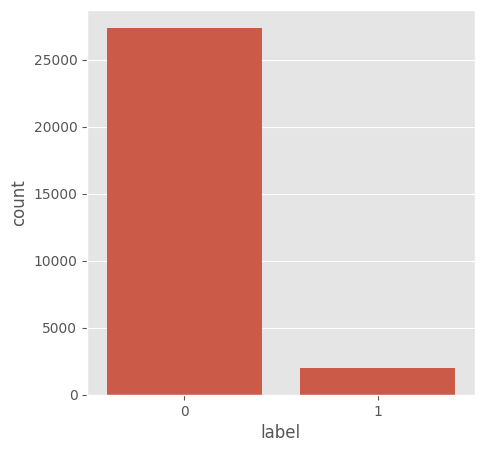

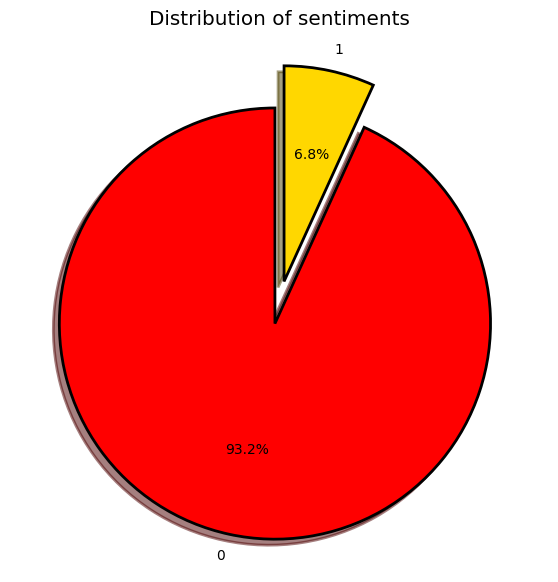

In [ ]:
# Visualizing the distribution of sentiments
fig = plt.figure(figsize=(5,5))
sns.countplot(x='label', data=tweet_df)
fig = plt.figure(figsize=(7,7))
colors = ("red", "gold")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = tweet_df['label'].value_counts()
explode = (0.1, 0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, startangle=90,
          wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of sentiments')
plt.show()

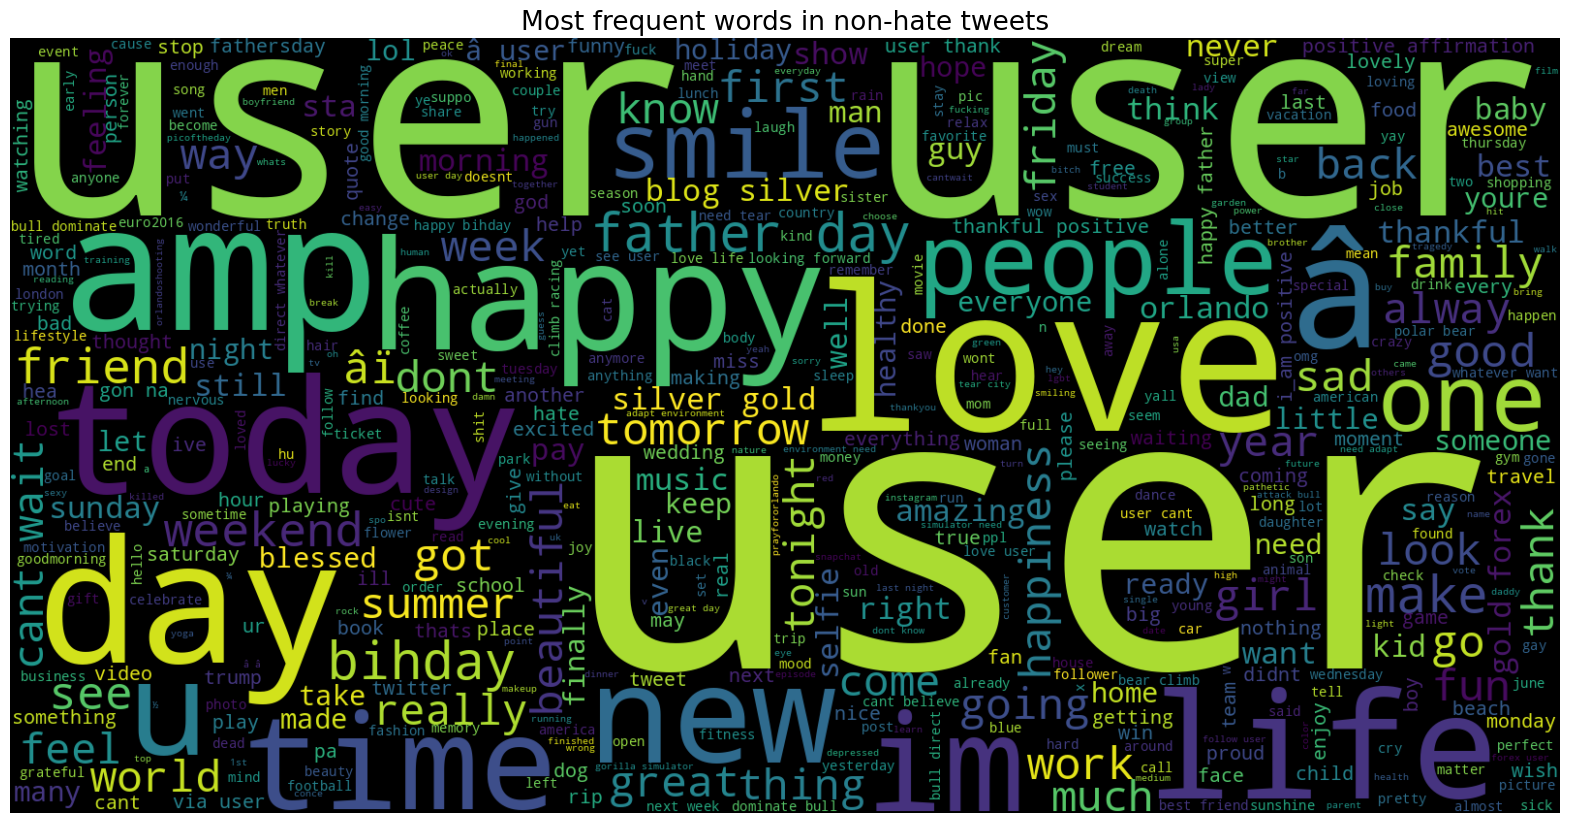

In [ ]:
# Visualizing frequent words in non-hate tweets
non_hate_tweets = tweet_df[tweet_df.label == 0]
text = ' '.join([str(word) for word in non_hate_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in non-hate tweets', fontsize=19)
plt.show()

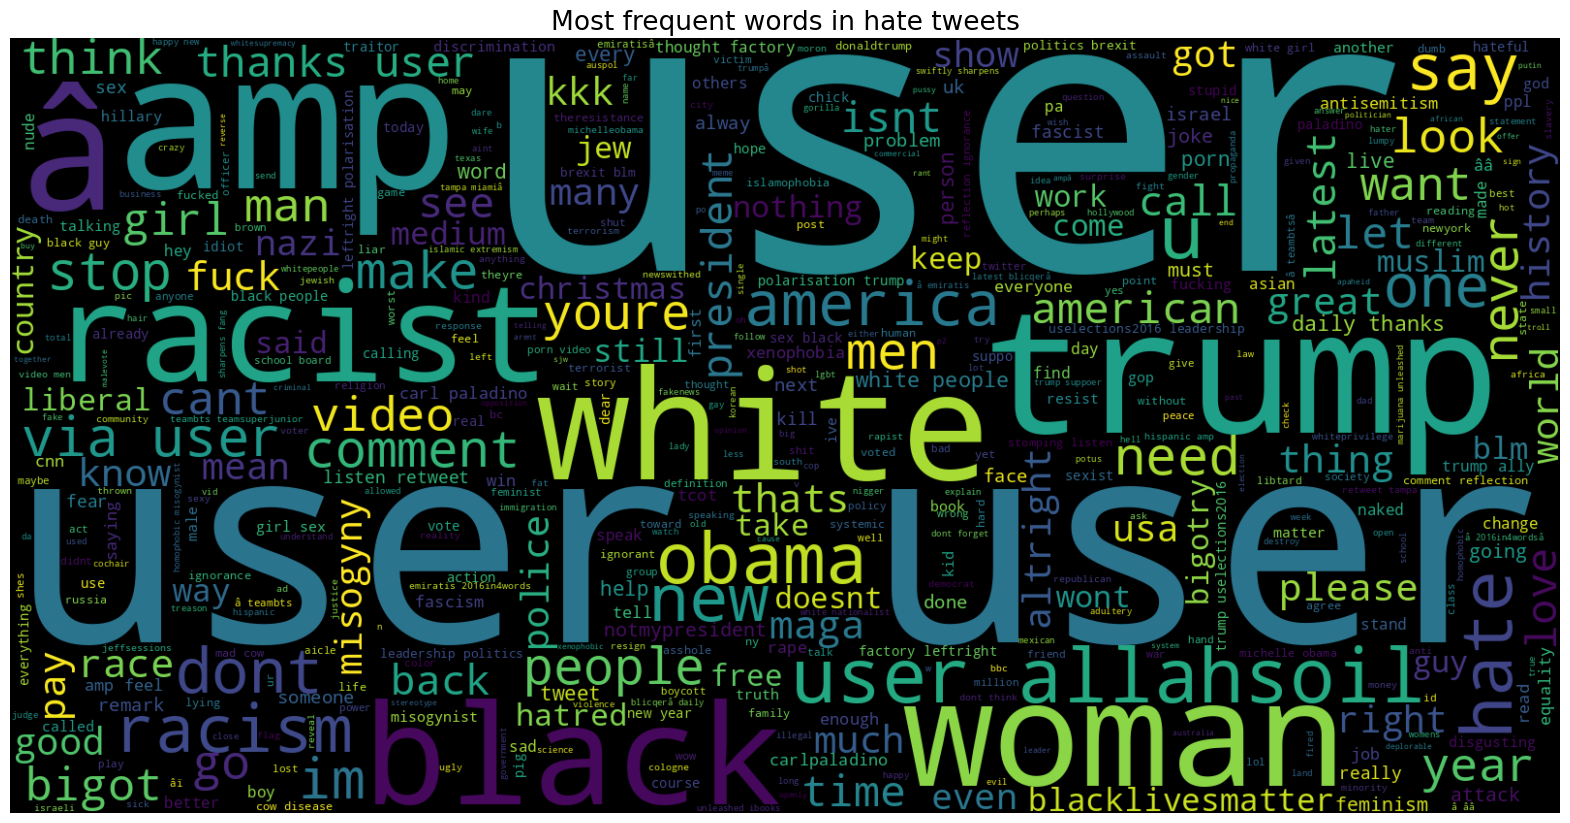

In [ ]:
# Visualizing frequent words in hate tweets
neg_tweets = tweet_df[tweet_df.label == 1]
text = ' '.join([str(word) for word in neg_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in hate tweets', fontsize=19)
plt.show()

In [ ]:
# Apply the TfidfVectorizer with n-grams
vect = TfidfVectorizer(ngram_range=(1, 2)).fit(tweet_df['tweet'])  # creating the TfidfVectorizer
feat_dataframe = vect.get_feature_names_out()  # getting the feature names from the vector
print("Number of features: {}\n".format(len(feat_dataframe)))
print("First 20 features: \n{}".format(feat_dataframe[:20]))

Number of features: 203177

First 20 features: 
['0000001' '0000001 polluting' '00027' '00027 photooftheday' '001' '0035'
 '00h30' '01' '01 4995' '01 7900' '01 blog' '01 croatia' '01 may'
 '01 shopalyssas' '0115' '0115 8599968' '0161' '0161 manny' '019'
 '019 previous']


In [ ]:
# Apply the TfidfVectorizer with n-grams (1,3)
vect = TfidfVectorizer(ngram_range=(1, 3)).fit(tweet_df['tweet'])
feat_dataframe = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feat_dataframe)))
print("First 20 features: \n{}".format(feat_dataframe[:20]))

Number of features: 373997

First 20 features: 
['0000001' '0000001 polluting' '0000001 polluting niger' '00027'
 '00027 photooftheday' '00027 photooftheday music' '001' '0035' '00h30'
 '01' '01 4995' '01 4995 rustic' '01 7900' '01 7900 shopalyssas' '01 blog'
 '01 blog silver' '01 croatia' '01 croatia happy' '01 may' '01 may actual']


In [ ]:
# Prepare features and labels for model training
X = tweet_df['tweet']
Y = tweet_df['label']
X = vect.transform(X)

In [ ]:
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# print(tweet_df['label'].value_counts())

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

Accuracy:  0.9318452888055887
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      5458
           1       1.00      0.03      0.05       411

    accuracy                           0.93      5869
   macro avg       0.97      0.51      0.51      5869
weighted avg       0.94      0.93      0.90      5869



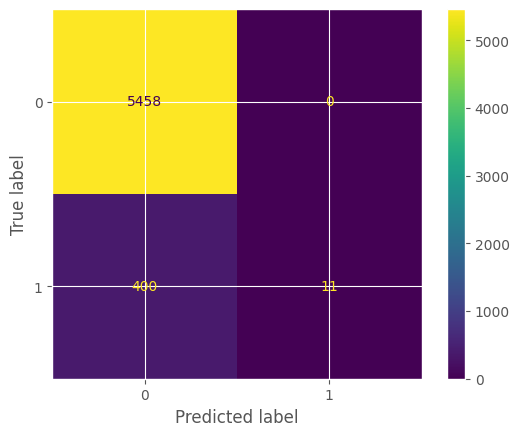

In [ ]:
# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
plt.show()


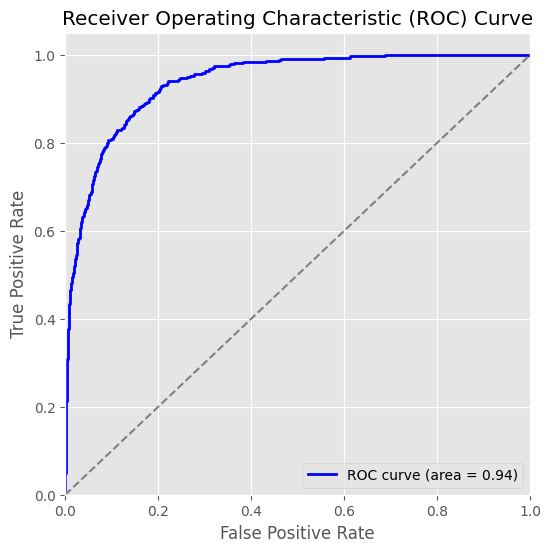

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute the ROC curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
def predict_hate_speech(text):
    # Preprocess the input text
    text = data_processing(text)  # Apply the same preprocessing steps
    text = lemmatizing(text)      # Apply lemmatization

    # Transform the text using the trained TF-IDF vectorizer
    text_vector = vect.transform([text])

    # Predict using the trained model
    prediction = model.predict(text_vector)

    # Return the result
    if prediction[0] == 1:
        return "Hate Speech Detected!"
    else:
        return "No Hate Speech Detected."

# Example usage
sentence = input("Enter a sentence: ")
result = predict_hate_speech(sentence)
print(result)

Enter a sentence: He is racist
Hate Speech Detected!
